KNeighborsClassifier
-----------------------------------------------------------------------------


Inserire numero azienda, consulatare il documento delle aziende per sceglierne il numero, vanno da 1 a 1638:  65
Inserire numero dei k vicini che si vogliono utilizzare 2


-----------------------------------------------------------------------------
Numero vittorie: 
109
   Aggiudicatari  Importi  Categorie  Class
0              1     4430          3      0
1              2     9450          6      0
2              2     9835          7      0
3              4    15409          1      0
4              5     8265         39      0
-----------------------------------------------------------------------------
Confusion Matrix
[[2166    9]
 [  40    6]]
-------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2175
           1       0.40      0.13      0.20        46

   micro avg       0.98      0.98      0.98      2221
   macro avg       0.69      0.56      0.59      2221
weighted avg       0.97      0.98      0.97      2221

-------------------------------------------------------------------------------
Accur

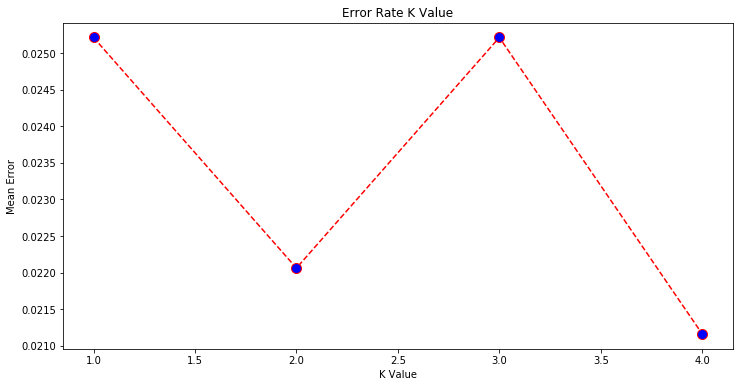

X=   Aggiudicatari  Importi  Categorie
0             65   123649         15, Predicted=0
AUC: 0.563


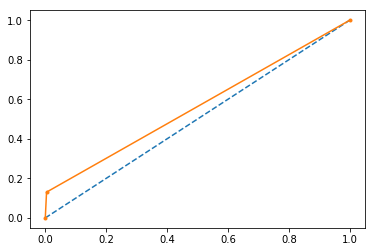

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.metrics import accuracy_score


print("KNeighborsClassifier")
print("-----------------------------------------------------------------------------")

df = pd.read_csv("Definitivo.csv", sep=";")
lista=[]
count=0

warnings.filterwarnings('ignore') 

i=input('Inserire numero azienda, consulatare il documento delle aziende per sceglierne il numero, vanno da 1 a 1638: ')
n=input('Inserire numero dei k vicini che si vogliono utilizzare')

for row in df.iterrows():
    #print(row[1]['Aggiudicatari'])
    agg=str(row[1]['Aggiudicatari'])
    confronto=str(i)
    if(agg==confronto):
         lista.append(1)
         count=count+1
    else:
        lista.append(0)
print("-----------------------------------------------------------------------------")
print("Numero vittorie: ")        
print(count)
df.insert(3,"Class",lista) 
#lista.clear() 
print(df.head())
print("-----------------------------------------------------------------------------")
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,shuffle=True)
classifier = KNeighborsClassifier(n_neighbors=int(n))
classifier.fit(X_train, y_train)
#PREDIZIONE
y_pred = classifier.predict(X_test)
#VALUTAZIONE ALGORITMO
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------------------------")
print("Accuratezza")
print(accuracy_score(y_test, y_pred))

print("-------------------------------------------------------------------------------")

# Calculating error for K values between 1 and 5
error = []


for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

test=pd.read_csv("test_set.csv", sep=";")
ynew = classifier.predict(test)
print("X=%s, Predicted=%s" % (test, ynew[0]))
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#y_pred = y_pred[:, 0]
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()